In [24]:
import pandas as pd
import geopandas as gpd
import nimfa
%matplotlib inline

In [25]:
df = pd.read_excel("../data/uk_general_election_results_2015.xlsx", sheetname=3)
cols = df.columns.tolist()[10:]

shares = df[cols].copy()
shares.fillna(0, inplace=True)

for col in cols:
    shares[col] = shares[col] / df["Electorate"]


In [26]:
V = shares.as_matrix()
nmf = nimfa.Nmf(V, seed="nndsvd", rank=5, max_iter=1000, update='divergence',
                objective='div')
nmf_fit = nmf()

In [27]:
# Con
print(nmf_fit.coef()[:, 16])

# Lab
print(nmf_fit.coef()[:, 58])

# LD
print(nmf_fit.coef()[:, 60])

# Green
print(nmf_fit.coef()[:, 42])

# UKIP
print(nmf_fit.coef()[:, 120])

# SNP
print(nmf_fit.coef()[:, 106])

[[  2.78437701e+00]
 [  2.22044605e-16]
 [  2.48300654e-01]
 [  2.11754526e-03]
 [  7.09207213e-11]]
[[  2.99377235e-02]
 [  2.44122090e+00]
 [  2.22044605e-16]
 [  2.22044605e-16]
 [  7.21234210e-12]]
[[  1.21772655e-01]
 [  2.12492618e-15]
 [  3.51641273e-02]
 [  2.22044605e-16]
 [  1.61080500e+00]]
[[  1.20809615e-01]
 [  8.47111695e-02]
 [  2.22044605e-16]
 [  5.42924207e-02]
 [  2.73206518e-01]]
[[  6.86377045e-01]
 [  3.25662312e-01]
 [  2.22044605e-16]
 [  8.59504760e-02]
 [  2.22044605e-16]]
[[  2.22044605e-16]
 [  2.22044605e-16]
 [  1.36938534e+00]
 [  2.22044605e-16]
 [  2.22044605e-16]]


In [55]:
ids = df['Constituency ID']
params = pd.DataFrame(nmf_fit.basis())
params = pd.concat([ids, params], axis=1)
params.columns = ["PCON13CD", "1", "2", "3", "4", "5"]

In [56]:
uk = gpd.read_file("../data/topo_wpc.json")

# Mercator projection
uk.crs = {'init' :'epsg:3395'}

In [ ]:
uk = uk.merge(params, on="PCON13CD")

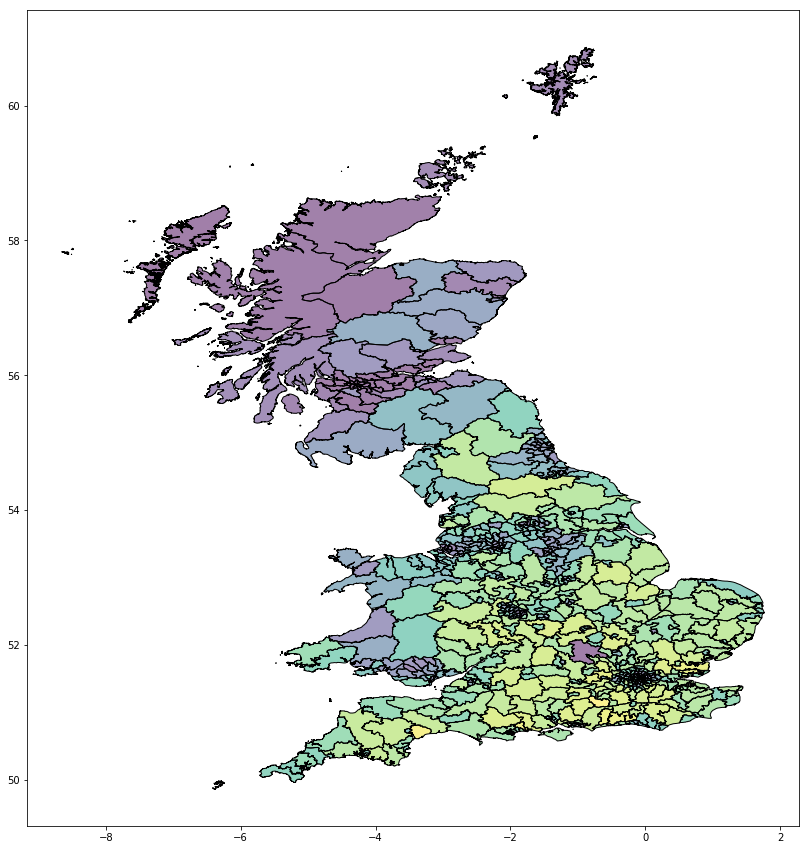

In [59]:
uk.plot(figsize=(15, 15), column="1")


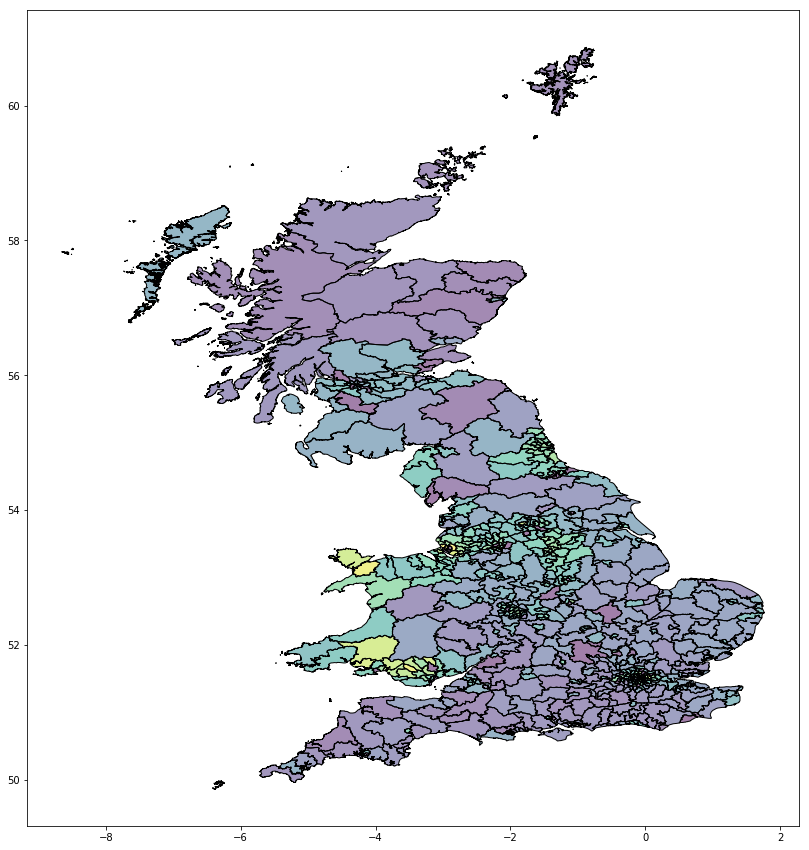

In [62]:
uk.plot(figsize=(15, 15), column="2")

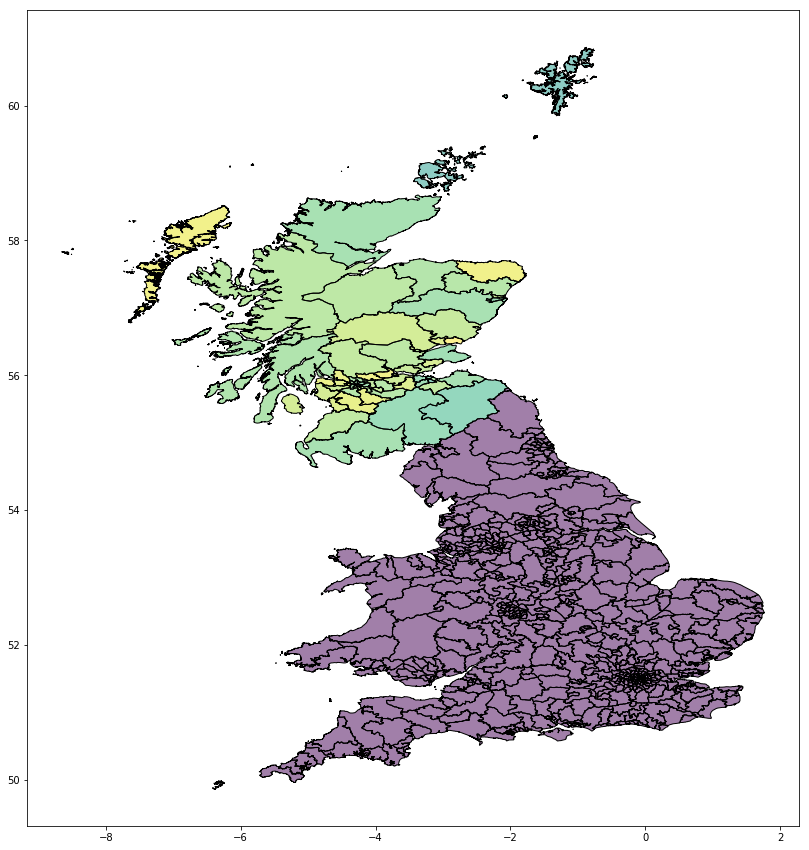

In [63]:
uk.plot(figsize=(15, 15), column="3")

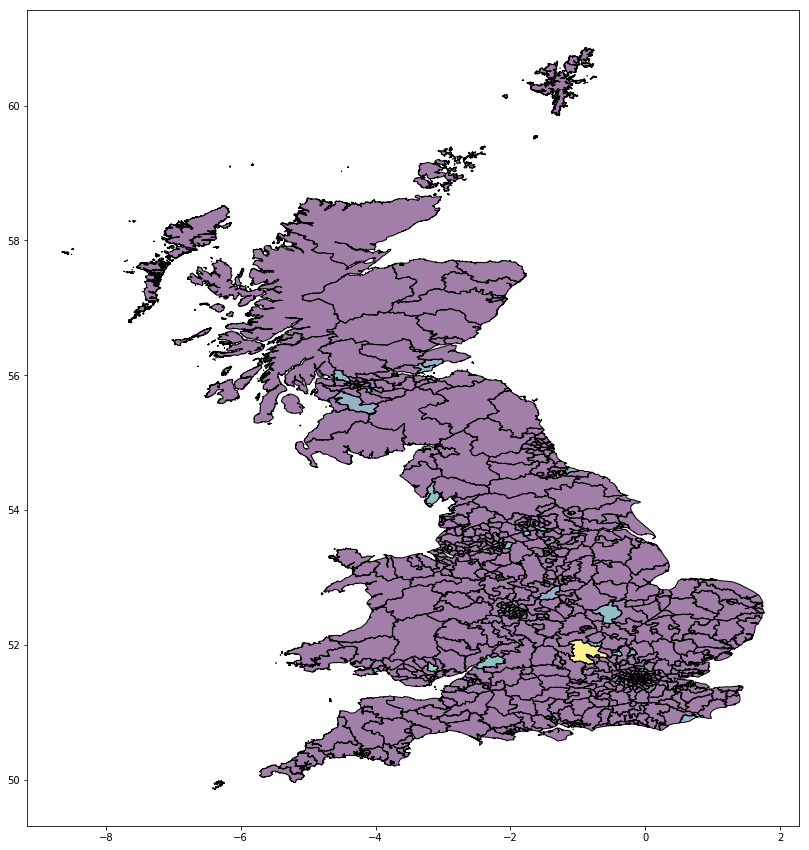

In [64]:
uk.plot(figsize=(15, 15), column="4")

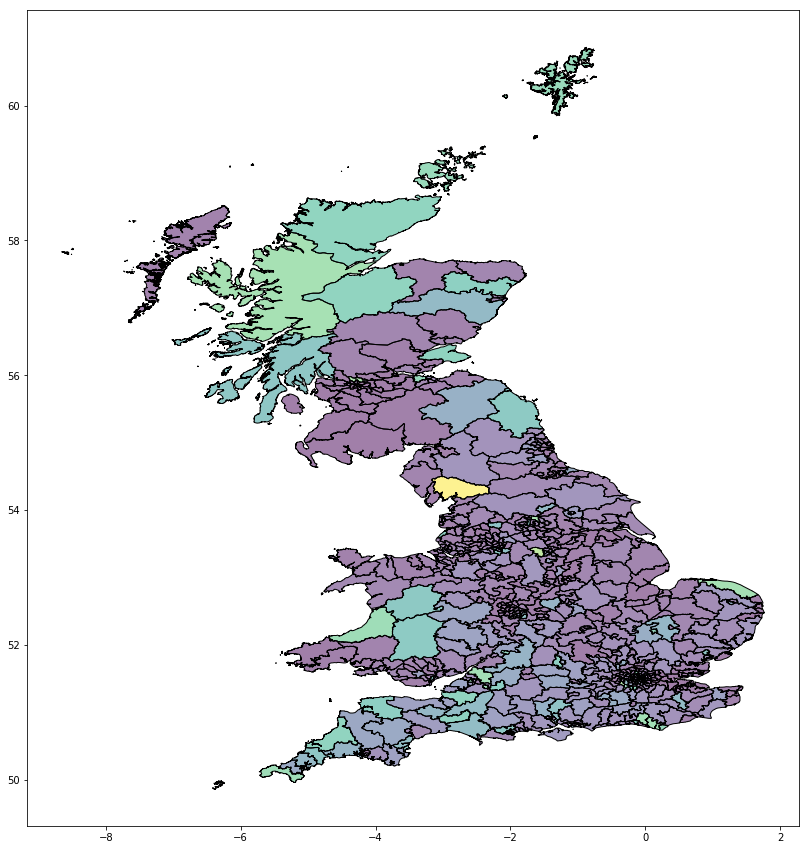

In [65]:
uk.plot(figsize=(15, 15), column="5")